In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/쿠팡 리뷰 분석/data_processed.csv')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 리뷰 칼럼의 문자열을 실제 리스트로 변환, 공백 결합
reviews = df['리뷰'].apply(lambda x: ' '.join(eval(x)))

# 리뷰 데이터 전처리
reviews = df['리뷰'].astype(str)  # 문자열로 변환

# 텍스트 벡터화
vectorizer = CountVectorizer(max_df=0.95,
                           min_df=2,
                           stop_words=['감사합니다', '만족합니다', '좋습니다', '좋아요',
                                     '너무', '정말', '있습니다', '사용하고'])
X = vectorizer.fit_transform(reviews)

#LDA 모델 학습
lda = LatentDirichletAllocation(n_components = 5, random_state= 42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# 토픽별 주요 단어 추출
words = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]  # 상위 10개 단어 추출
    topics.append((f"Topic {topic_idx+1}", top_words))

In [ ]:
# 토픽별 주요 단어와 확률 출력
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n토픽 #{topic_idx + 1}:")
        top_words_idx = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        weights = [topic[i] for i in top_words_idx]
        for word, weight in zip(top_words, weights):
            print(f"{word}: {weight:.4f}")

# 문서별 토픽 분포 확인
def print_document_topics(lda_model, X):
    doc_topics = lda_model.transform(X)
    for idx, doc_topic in enumerate(doc_topics):
        print(f"\n문서 #{idx + 1} 토픽 분포:")
        for topic_idx, topic_prob in enumerate(doc_topic):
            print(f"토픽 {topic_idx + 1}: {topic_prob:.4f}")

# 결과 출력
feature_names = vectorizer.get_feature_names_out()
print_topics(lda, feature_names)


토픽 #1:
빠른: 21.0414
배송: 18.9316
출고: 8.1996
예약판매: 8.1996
2주차: 7.2000
9월: 7.2000
순차: 7.2000
택배배송: 7.2000
무료: 7.2000
잘받았습니다: 7.1982

토픽 #2:
빠르고: 26.4993
배송: 22.8921
가성비: 19.9546
배송도: 16.5234
좋은: 8.0165
모니터는: 7.7216
엘지: 7.1972
배송빠르고: 6.7060
저렴하게: 6.2089
왔어요: 6.2039

토픽 #3:
모니터: 16.0102
화면: 11.2284
있어요: 11.2180
쓰고: 8.2065
커서: 7.1986
문제없이: 5.1704
가성비: 4.4411
배송이: 4.2152
안전하게: 4.2080
듀얼로: 4.2063

토픽 #4:
제품: 17.1971
모니터: 15.4108
좋고: 12.1332
사무실에서: 10.1440
저렴한: 10.0504
가격에: 8.9991
좋은: 8.9213
좋네요: 8.3228
구매했는데: 7.6187
사무용으로: 7.2084

토픽 #5:
아주: 12.1964
lg: 9.9776
가격도: 9.1973
모니터로: 8.3737
빠른배송: 7.2218
크고: 7.2166
사무용으로: 6.2187
화질도: 5.2123
사무용: 5.1978
배송도: 4.8712


In [ ]:
# 처음 5개 문서의 토픽 분포 확인
print("\n처음 5개 문서의 토픽 분포:")
print_document_topics(lda, X[:5])


처음 5개 문서의 토픽 분포:

문서 #1 토픽 분포:
토픽 1: 0.0149
토픽 2: 0.0135
토픽 3: 0.0134
토픽 4: 0.9448
토픽 5: 0.0134

문서 #2 토픽 분포:
토픽 1: 0.4692
토픽 2: 0.0204
토픽 3: 0.4692
토픽 4: 0.0211
토픽 5: 0.0201

문서 #3 토픽 분포:
토픽 1: 0.0404
토픽 2: 0.0411
토픽 3: 0.0406
토픽 4: 0.8374
토픽 5: 0.0404

문서 #4 토픽 분포:
토픽 1: 0.0223
토픽 2: 0.0224
토픽 3: 0.0224
토픽 4: 0.9107
토픽 5: 0.0224

문서 #5 토픽 분포:
토픽 1: 0.0509
토픽 2: 0.6003
토픽 3: 0.0500
토픽 4: 0.0504
토픽 5: 0.2484


In [ ]:
import warnings
import matplotlib.pyplot as plt
import matplotlib

# 모든 matplotlib 경고 무시
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 폰트 캐시 초기화
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 추가적인 경고 메시지 비활성화
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124788 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

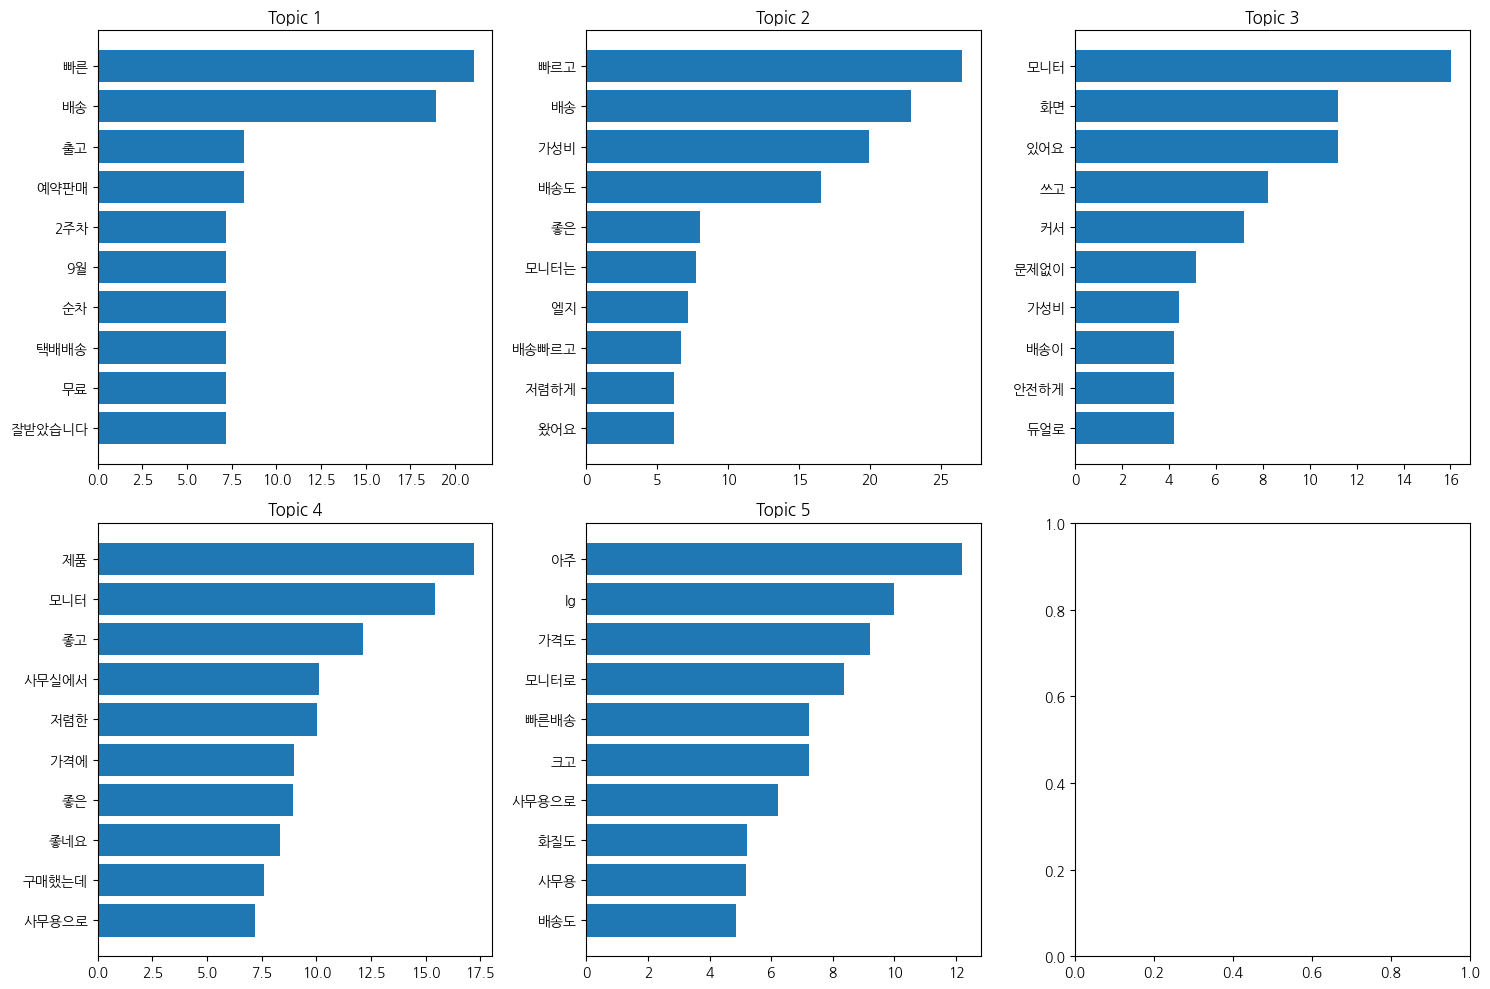

In [ ]:
# 토픽별 주요 단어와 확률 시각화
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(model, feature_names, n_top_words=10, n_topics=5):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_[:n_topics]):
        top_words_idx = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        weights = topic[top_words_idx]

        ax = axes[topic_idx]
        ax.barh(top_words, weights)
        ax.set_title(f'Topic {topic_idx+1}')
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()

# 시각화 실행
plot_top_words(lda, vectorizer.get_feature_names_out())

In [ ]:
import os

# 토픽별 주요 단어와 확률을 DataFrame으로 변환하는 함수
def create_topics_dataframe(model, feature_names, n_top_words=10):
    rows = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        weights = [topic[i] for i in top_words_idx]

        # 각 단어와 가중치를 DataFrame에 추가
        for word, weight in zip(top_words, weights):
            rows.append({
                'Topic': f'Topic {topic_idx + 1}',
                'Word': word,
                'Weight': weight
            })

    return pd.DataFrame(rows)

# DataFrame 생성
df_topics = create_topics_dataframe(lda, feature_names)

In [ ]:
# CSV 파일로 저장
file_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/쿠팡 리뷰 분석', 'LDA.csv')
df_topics.to_csv(file_path, index=False, encoding='utf-8-sig')